# Regression

## Mock data

In [0]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

Here we use a simple function:

$$
y = ax^2 + b
$$

And we will add some noise to $y$.

In [0]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())

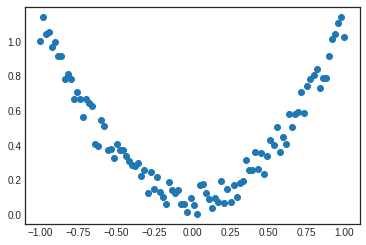

In [107]:
plt.scatter(x.numpy(), y.numpy())

## Build a network

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class Net(nn.Module):

  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__()

    # Define the structure of each layer
    self.hidden = nn.Linear(n_feature, n_hidden)
    self.predict = nn.Linear(n_hidden, n_output)

  def forward(self, x):
    x = F.relu(self.hidden(x))
    x = self.predict(x)

    return x

In [110]:
net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


## Train network

In [0]:
import torch.optim as optim

In [0]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
loss_func = nn.MSELoss()

predictions_list = []

for t in range(2000):

  # Zero the parameters gradients
  optimizer.zero_grad()

  # Forward
  prediction = net(x)

  # Compute loss
  loss = loss_func(prediction, y)

  # Backprop
  loss.backward()

  # Update parameters
  optimizer.step()

  # For visualization
  if t % 5 == 0:
    predictions_list.append(prediction.data.numpy())


Visualize the regression:

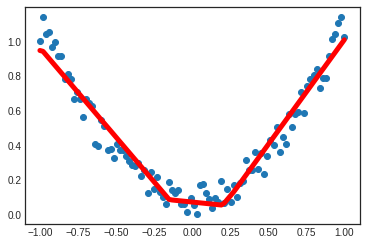

In [119]:
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()
ax.scatter(x.data.numpy(), y.data.numpy())
line, = ax.plot([], [], 'r-', lw=5)

def animate(i):
  line.set_ydata(predictions_list[i])
  return line,

def init():
  line.set_xdata(x.data.numpy())
  line.set_ydata(predictions_list[0])
  return line,

anim = animation.FuncAnimation(fig=fig,
                              func=animate,
                              frames=100,
                              init_func=init,
                              interval=100,
                              blit=True)

HTML(anim.to_html5_video())